# Introduction
This notbook introduces the HyperWeed dataset. The data is saved as 3 dimensional numpy array.

In [1]:
# importing libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import cv2 
import ipywidgets
from sklearn.cluster import KMeans

In [2]:
# important functions

def readData(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.npy'):
            file_path = os.path.join(directory, filename)
            array = np.load(file_path)
            data.append(array)
    return data


def display_random_images(data, num_images):
    if len(data) < num_images:
        print(f'Not enough images in data. Only {len(data)} images available.')
        return

    random_indices = random.sample(range(len(data)), num_images)
    
    fig, axs = plt.subplots(1, num_images, figsize=(20, 20))
    for i, img_idx in enumerate(random_indices):
        # Select one image from the 3D array
        rgb_img = pseudoRGB(data, img_idx)
        axs[i].imshow(rgb_img)
        axs[i].axis('off')
    
    plt.show()
      
    
def pseudoRGB (data, listNo):
    # Assuming the channels are evenly spaced, calculate the channel numbers for red, green, and blue
    total_channels = 224
    wavelength_range = 1000 - 300
    channel_spacing = wavelength_range / total_channels

    R_channel = round((590 - 300) / channel_spacing)
    G_channel = round((570 - 300) / channel_spacing)
    B_channel = round((475 - 300) / channel_spacing)

    img = data[listNo]
    img = img[:,:,[R_channel, G_channel, B_channel]]

    return img


def plot_intensity(image, x, y):
    # Extract the intensity values at the given (x, y) coordinate
    intensity_values = image[y, x, :]

    # Assuming the wavelengths are evenly spaced from 1 to 224
    wavelengths = range(1, 225)

    # Plot the line
    plt.plot(wavelengths, intensity_values, label='({}, {})'.format(x, y))
    
    
def click_event(event, x, y, flags, params):
    global xValue, yValue
    if event == cv2.EVENT_LBUTTONDOWN:
        if x < 0 or y < 0 or x >= img.shape[1] or y >= img.shape[0]:
            print("Out of bounds")
        else:
            xyValue.append((x, y))
            
            
def unfold(data):
    x,y,z = data.shape
    unfolded = data.reshape(x*y,z)
    for i in range(unfolded.shape[1]):
        col = unfolded[:,i]
        zero_indices = np.where(col == 0)[0]
        unfolded = np.delete(unfolded, zero_indices, axis=0)
        
    return unfolded

def unfold_all(className):
    unfolded = []
    for i in range(len(className)):
        unfolded.append(unfold(className[i]))
        return np.vstack(unfolded)

# Reading the data

In [3]:
# Reading the npy images
directory = '/Users/billygrahamram/Documents/Envs-Codes/ScientificData_Manuscript/npyImages/withbg'
# directory = '/Users/billygrahamram/Documents/Envs-Codes/ScientificData_Manuscript/npyImages/withoutbg'


data = readData(directory)



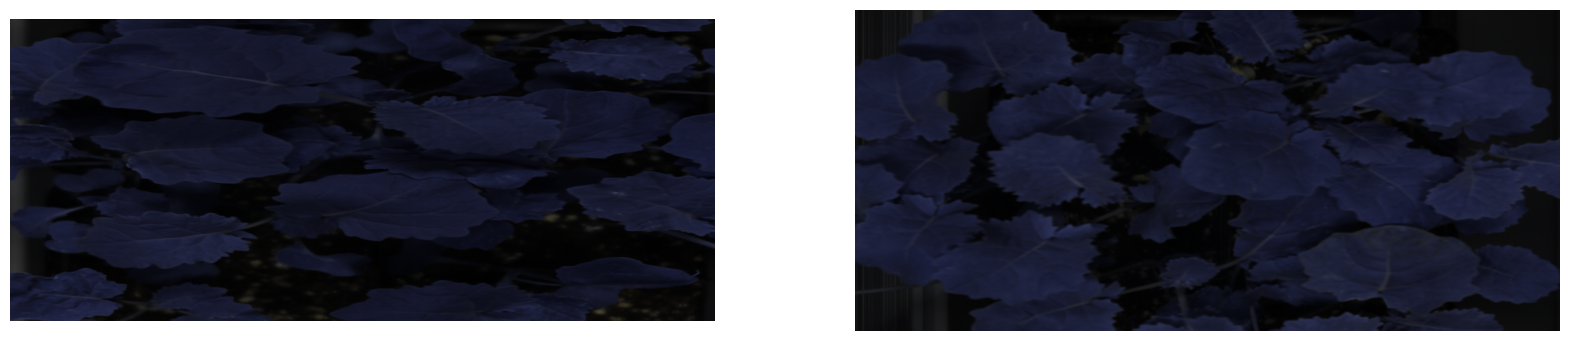

In [4]:
# Display Random Images
display_random_images(data, 2)


In [5]:
hsi = data[0]
img = pseudoRGB(data,2)

IndexError: index 246 is out of bounds for axis 1 with size 235

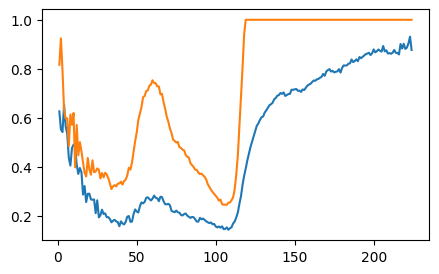

In [6]:
xyValue = []

# # driver function 
# if __name__=="__main__": 

# displaying the image 
cv2.imshow('image', img)

# setting mouse handler for the image 
# and calling the click_event() function 
cv2.setMouseCallback('image', click_event) 

# wait for a key to be pressed to exit 
cv2.waitKey(0) 

# destroy all windows
cv2.destroyAllWindows()

# add a delay to give the window time to close
cv2.waitKey(1)


# Create the plot
plt.figure(figsize=(5, 3))

for i in range(len(xyValue)):
    x,y = xyValue[i]
    plot_intensity(hsi, x, y)

# Add title, labels, and legend
plt.title('Intensity vs Wavelength')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()

In [7]:


# folders = [folder1, folder2, folder3]
# cultivar, fireR, fireS = map(readdata, folders)



# import concurrent.futures
# # data = [cultivar, fireR, fireS]
# data = [unfoldeddata]
# with concurrent.futures.ProcessPoolExecutor() as executor:
#     unfoldeddata = executor.map(unfold_all, data)


unfoldeddata = unfold_all(data)

# Scatter Plots

In [8]:

def scatterPlot_func(band_1=50, band_2=150):
    # Assuming 'image' is your 3D hyperspectral image
    # Flatten the spatial dimensions of the image
    flattened_image = hsi.reshape(-1, hsi.shape[-1])

    # Create the scatter plot
    plt.figure(figsize=(10,3))
    plt.scatter(flattened_image[:, band_1], flattened_image[:, band_2], s=0.5)

    plt.xlabel(f'Band {band_1}')
    plt.ylabel(f'Band {band_2}')
    plt.title('Scatter plot of spectral signatures')
    plt.show()



ipywidgets.interact(scatterPlot_func, band_1=(0,223,1),band_2=(0,223,1))

interactive(children=(IntSlider(value=50, description='band_1', max=223), IntSlider(value=150, description='ba…

<function __main__.scatterPlot_func(band_1=50, band_2=150)>

In [10]:

def linePlot_func(value=50):
    # Assuming 'image' is your 3D hyperspectral image
    # Flatten the spatial dimensions of the image
  
    # Select the first row
    plottingRow = unfoldeddata[value, :]
    # Create the line plot
    plt.figure(figsize=(10, 3))
    plt.plot(plottingRow)
    plt.title('Spectral Plot')
    plt.show()

ipywidgets.interact(linePlot_func, value=(0,223,1))

interactive(children=(IntSlider(value=50, description='value', max=223), Output()), _dom_classes=('widget-inte…

<function __main__.linePlot_func(value=50)>

In [12]:

# Create a KMeans instance with 2 clusters (since you have two types of spectral signatures)
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit the model to your data
kmeans.fit(unfoldeddata)

# The labels_ attribute holds the cluster labels for each data point
labels = kmeans.labels_
    
    
def linePlot_func(band_1=50, band_2=100):
    # Create the scatter plot
    plt.figure(figsize=(10, 5))
    plt.scatter(unfoldeddata[:, band_1], unfoldeddata[:, band_2], c=labels, s=0.5)
    plt.title('Scatter plot of the data')
    plt.show()

ipywidgets.interact(linePlot_func, band_1=(0,223,1), band_2=(0,223,1))

/Users/billygrahamram/Documents/Envs-Codes/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


interactive(children=(IntSlider(value=50, description='band_1', max=223), IntSlider(value=100, description='ba…

<function __main__.linePlot_func(band_1=50, band_2=100)>

# DataCleaning